In [27]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import os
import cv2

import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
#import segmentation_models_pytorch as smp

In [28]:
import tensorflow as tf

In [29]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization

In [75]:
# from tensorflow.keras.layers.convolutional import Conv2D
# from tensorflow.keras.layers.pooling import GlobalMaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import GlobalMaxPooling2D,MaxPooling2D

In [31]:
# from keras.models import Sequential 
# from keras.layers import Activation, Flatten
# from keras.layers import Dense, Dropout

In [32]:
# from keras.models import Sequential
# from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D

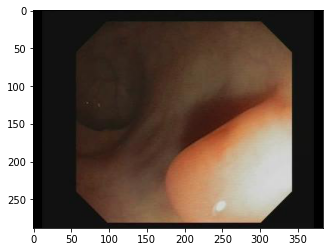

In [33]:
# Display a sample image
img=mpimg.imread('/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1.jpg')
imgplot = plt.imshow(img)

In [34]:
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    return image

### Save Each Filepath and Filename into List for Each Image

In [35]:
# filepath_list: 
# each element contains a list of two elements
# filepath[0] = filepath, filepath[1] = filename
filepath_list = []
file_annot_list = []
for filename in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/"):
    if filename.endswith(".jpg"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/", filename)
        filepath_list.append([filepath, filename])

for file_name in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/"):
    if file_name.endswith(".xml"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/", file_name)
        file_annot_list.append([filepath, file_name])


### Read and Save Each Image into Image List

In [36]:
image_list = []
for filepath in filepath_list:
    image = read_img(filepath[0])
    image_list.append(image)

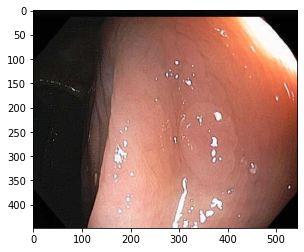

In [37]:
plt.imshow(image_list[0])

### Read and Save Each Annotation into Annotation List

In [38]:
annotation_list = []
for file in file_annot_list:
    annot = file[0]
    annotation_list.append(annot)

In [39]:
# Finding the specific annotation in the xml file
a_list = []
for i in range(28773):
    tree = ET.parse(annotation_list[i])
    root = tree.getroot()
    object = root.find("object")
    if(object):
        polyp_name = object.find("name").text
        a_list.append(polyp_name)
    else:
        a_list.append("Not Specified")

In [40]:
# Finding the unique elements in the list
x = np.array(a_list)
print(np.unique(x))

['Not Specified' 'adenomatous' 'hyperplastic']


In [41]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (100, 100)) # Resizing the image to 224x224 dimention
    return (image)

In [42]:
im_list = []
for i in image_list:
    im_list.append(scale_resize_image(i))  

2022-04-29 15:43:04.307189: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-29 15:43:04.314817: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


## Train Test Split

In [43]:
im_list_new = np.array(im_list[:100])
type(im_list_new)

numpy.ndarray

In [44]:
a_list_new = np.array(a_list[:100])
type(a_list_new)

numpy.ndarray

In [154]:
print(len(im_list_new))
print(len(a_list_new))

100
100


In [ ]:
im_list_1000 = np.array(im_list[:1000])
type(im_list_new)

In [155]:
a_list_1000 = np.array(a_list[:1000])
type(a_list_new)

numpy.ndarray

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
y = le.fit_transform(a_list_new)

In [60]:
X = im_list_new

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,3)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 3,857,027
Trainable params: 3,857,027
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [118]:
model.fit(X_train,y_train,epochs=10,verbose=True)
#ValueError: Error when checking target: expected dense_13 to have 4 dimensions, but got array with shape (3, 1)

Train on 80 samples
Epoch 1/10
80/80 [==============================] - 1s 7ms/sample - loss: 6.3702 - accuracy: 0.4625
Epoch 2/10
80/80 [==============================] - 0s 1ms/sample - loss: 10.2937 - accuracy: 0.3625
Epoch 3/10
80/80 [==============================] - 0s 1ms/sample - loss: 9.8315 - accuracy: 0.6125
Epoch 4/10
80/80 [==============================] - 0s 1ms/sample - loss: 5.4317 - accuracy: 0.4125
Epoch 5/10
80/80 [==============================] - 0s 1ms/sample - loss: 3.5081 - accuracy: 0.4500
Epoch 6/10
80/80 [==============================] - 0s 1ms/sample - loss: 2.6953 - accuracy: 0.6250
Epoch 7/10
80/80 [==============================] - 0s 1ms/sample - loss: 1.6961 - accuracy: 0.4125
Epoch 8/10
80/80 [==============================] - 0s 1ms/sample - loss: 1.0066 - accuracy: 0.6625
Epoch 9/10
80/80 [==============================] - 0s 1ms/sample - loss: 1.0165 - accuracy: 0.5125
Epoch 10/10
80/80 [==============================] - 0s 1ms/sample - loss: 0.85

In [119]:
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  1.2848784923553467
accuracy:  0.55


In [150]:
model_1 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(100,100,3)),
        tf.keras.layers.Dense(300, activation='relu'),
        #tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dense(75, activation='relu'),
        tf.keras.layers.Dense(35, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')    
    ])

In [151]:
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [152]:
model_1.fit(X_train,y_train,epochs=15,verbose=True)

Train on 80 samples
Epoch 1/15
80/80 [==============================] - 1s 9ms/sample - loss: 5.0803 - accuracy: 0.4375
Epoch 2/15
80/80 [==============================] - 0s 2ms/sample - loss: 3.8282 - accuracy: 0.4625
Epoch 3/15
80/80 [==============================] - 0s 2ms/sample - loss: 3.0528 - accuracy: 0.6250
Epoch 4/15
80/80 [==============================] - 0s 3ms/sample - loss: 1.8694 - accuracy: 0.4750
Epoch 5/15
80/80 [==============================] - 0s 3ms/sample - loss: 1.1067 - accuracy: 0.4875
Epoch 6/15
80/80 [==============================] - 0s 2ms/sample - loss: 1.6089 - accuracy: 0.6250
Epoch 7/15
80/80 [==============================] - 0s 3ms/sample - loss: 1.3599 - accuracy: 0.5000
Epoch 8/15
80/80 [==============================] - 0s 2ms/sample - loss: 2.2234 - accuracy: 0.5875
Epoch 9/15
80/80 [==============================] - 0s 2ms/sample - loss: 1.4248 - accuracy: 0.4250
Epoch 10/15
80/80 [==============================] - 0s 2ms/sample - loss: 1.927

In [153]:
loss, accuracy  = model_1.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  1.1584012508392334
accuracy:  0.6


### CNN

In [65]:
len_classes=3
dropout_rate=0.2
cnn_model = Sequential()
cnn_model.add(Lambda(lambda img: (img/255.0)-0.5, input_shape=(100, 100, 3)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=128, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=len_classes, kernel_size=1, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(GlobalMaxPooling2D())
cnn_model.add(Activation("softmax"))

In [66]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
dropout_4 (Dropout)          (None, 98, 98, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 98, 98, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 128)       73856     
_________________________________________________________________
dropout_5 (Dropout)          (None, 96, 96, 128)      

In [67]:
cnn_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

In [69]:
cnn_model.fit(X_train,y_train, epochs=10)

Train on 80 samples
Epoch 1/10
80/80 [==============================] - 18s 219ms/sample - loss: 0.8539 - accuracy: 0.6125
Epoch 2/10
80/80 [==============================] - 17s 216ms/sample - loss: 0.9271 - accuracy: 0.5250
Epoch 3/10
80/80 [==============================] - 17s 218ms/sample - loss: 0.8820 - accuracy: 0.5250
Epoch 4/10
80/80 [==============================] - 18s 220ms/sample - loss: 0.9211 - accuracy: 0.5000
Epoch 5/10
80/80 [==============================] - 22s 270ms/sample - loss: 0.8639 - accuracy: 0.5500
Epoch 6/10
80/80 [==============================] - 19s 234ms/sample - loss: 0.8939 - accuracy: 0.5375
Epoch 7/10
80/80 [==============================] - 17s 217ms/sample - loss: 0.9139 - accuracy: 0.5250
Epoch 8/10
80/80 [==============================] - 20s 245ms/sample - loss: 0.8304 - accuracy: 0.6375
Epoch 9/10
80/80 [==============================] - 19s 232ms/sample - loss: 0.8442 - accuracy: 0.6250
Epoch 10/10
80/80 [==============================] - 

In [70]:
loss, accuracy  = cnn_model.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  1.195299506187439
accuracy:  0.1


In [73]:
from tensorflow.keras.layers import LeakyReLU


CNN Model 

In [120]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100, 100, 3),padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D((2, 2),padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

cnn.add(Flatten())

cnn.add(Dense(128, activation='linear'))
cnn.add(LeakyReLU(alpha=0.1))                  
cnn.add(Dense(3, activation='softmax'))

In [121]:
cnn.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", metrics=["sparse_categorical_accuracy"])

In [123]:
cnn.fit(X_train,y_train, epochs=30)

Train on 80 samples
Epoch 1/30
80/80 [==============================] - 3s 32ms/sample - loss: 0.8433 - sparse_categorical_accuracy: 0.5750
Epoch 2/30
80/80 [==============================] - 3s 32ms/sample - loss: 0.7892 - sparse_categorical_accuracy: 0.6125
Epoch 3/30
80/80 [==============================] - 2s 31ms/sample - loss: 0.7590 - sparse_categorical_accuracy: 0.6375
Epoch 4/30
80/80 [==============================] - 3s 32ms/sample - loss: 0.7341 - sparse_categorical_accuracy: 0.7625
Epoch 5/30
80/80 [==============================] - 3s 31ms/sample - loss: 0.6603 - sparse_categorical_accuracy: 0.7000
Epoch 6/30
80/80 [==============================] - 2s 30ms/sample - loss: 0.6030 - sparse_categorical_accuracy: 0.7250
Epoch 7/30
80/80 [==============================] - 3s 31ms/sample - loss: 0.5361 - sparse_categorical_accuracy: 0.8625
Epoch 8/30
80/80 [==============================] - 2s 31ms/sample - loss: 0.5106 - sparse_categorical_accuracy: 0.7875
Epoch 9/30
80/80 [==

In [124]:
cnn.history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy'])

In [126]:
loss, accuracy  = cnn.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  4.00540828704834
accuracy:  0.35


DIfferent model

In [135]:
cnn2=tf.keras.models.Sequential()
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[100,100,3]))
cnn2.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu"))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cnn2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cnn2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
cnn2.add(tf.keras.layers.Flatten())
cnn2.add(tf.keras.layers.Dropout(0.5,noise_shape=None,seed=None))
cnn2.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn2.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [136]:
cnn2.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", metrics=["sparse_categorical_accuracy"])

In [137]:
cnn2.fit(X_train,y_train, epochs=15)

Train on 80 samples
Epoch 1/15
80/80 [==============================] - 5s 59ms/sample - loss: 1.0438 - sparse_categorical_accuracy: 0.5125
Epoch 2/15
80/80 [==============================] - 4s 52ms/sample - loss: 0.8594 - sparse_categorical_accuracy: 0.6125
Epoch 3/15
80/80 [==============================] - 4s 52ms/sample - loss: 0.8288 - sparse_categorical_accuracy: 0.6125
Epoch 4/15
80/80 [==============================] - 4s 52ms/sample - loss: 0.8144 - sparse_categorical_accuracy: 0.6750
Epoch 5/15
80/80 [==============================] - 4s 50ms/sample - loss: 0.7925 - sparse_categorical_accuracy: 0.6125
Epoch 6/15
80/80 [==============================] - 4s 51ms/sample - loss: 0.7442 - sparse_categorical_accuracy: 0.7000
Epoch 7/15
80/80 [==============================] - 4s 48ms/sample - loss: 0.7158 - sparse_categorical_accuracy: 0.7250
Epoch 8/15
80/80 [==============================] - 4s 49ms/sample - loss: 0.6517 - sparse_categorical_accuracy: 0.7250
Epoch 9/15
80/80 [==

In [138]:
loss, accuracy  = cnn2.evaluate(X_test, y_test, verbose=False)
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  3.087697982788086
accuracy:  0.25
